In [1]:
import numpy as np
import pandas as pd

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Pretty display for notebooks
%matplotlib inline

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("../../data/processed/data_train_eda.csv")

In [3]:
legal_drugs = ['Alcohol', 'Nicotine', 'Caff', 'Choc']
illegal_drugs1 = ['Cannabis', 'Legalh', 'LSD', 'Shrooms', 'Amphet', 
                  'Amyl', 'Ecstasy', 'Ketamine', 'Coke']
illegal_drugs2 = ['Meth', 'Benzos', 'Heroin', 'Crack']

In [4]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin
0,35-44,0,diploma,uk,white-asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,25-34,1,doctorate_degree,uk,white,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
2,35-44,1,diploma,uk,white,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,18-24,0,masters_degree,uk,white,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
4,35-44,0,doctorate_degree,uk,white,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0


In [22]:
df.describe()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Alcohol_bin,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.00000,1877.000000,1877.000000
mean,0.500799,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409,0.964305,0.359084,0.196058,0.405967,0.980288,0.669686,0.981886,0.362813,0.100160,0.396910,0.111348,0.184337,0.402770,0.293554,0.220565,0.36601,0.669153,0.120405
std,0.500133,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160,0.185579,0.479860,0.397118,0.491209,0.139047,0.470452,0.133399,0.480940,0.300293,0.489387,0.314646,0.387862,0.490586,0.455511,0.414738,0.48184,0.470644,0.325521
min,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,1.000000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000
max,1.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
#drugs_2 = df.iloc[:,12:30]
#drugs_sorted = df.groupby('Education').sum()
#group_alc = traits.groupby(drug_1)
#group_alc_mean = group_alc.median()
#drugs_sorted

## Usage per Education for Drug bins

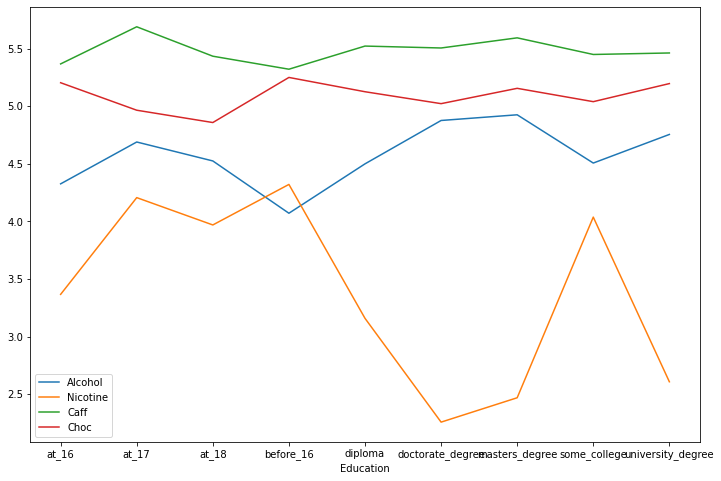

In [7]:
education_grouped_sum = df.groupby('Education').sum()
fig = plt.figure(figsize=(12,8))
for drug in legal_drugs:
    sns.lineplot(x=education_grouped_sum.index, y=education_grouped_sum[drug]/df.Education.value_counts(),
             data=education_grouped_sum, label=drug)

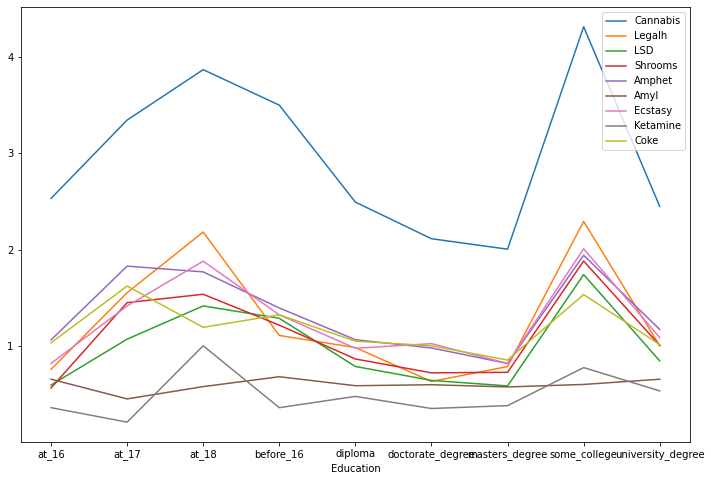

In [8]:
education_grouped_sum = df.groupby('Education').sum()
fig = plt.figure(figsize=(12,8))
for drug in illegal_drugs1:
    sns.lineplot(x=education_grouped_sum.index, y=education_grouped_sum[drug]/df.Education.value_counts(),
             data=education_grouped_sum, label=drug)

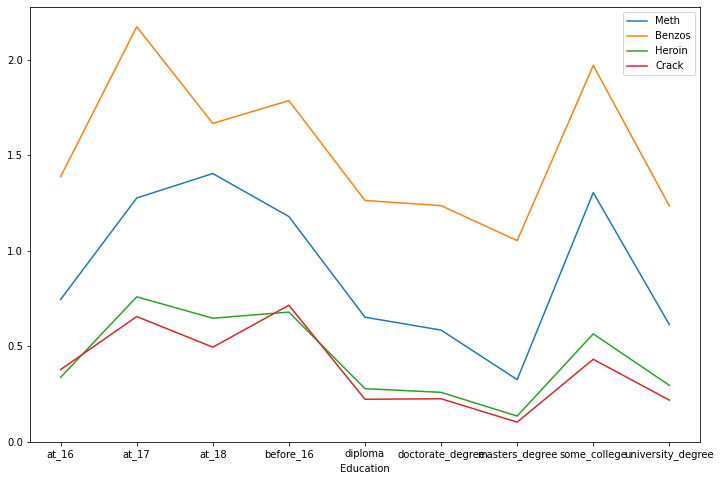

In [9]:
education_grouped_sum = df.groupby('Education').sum()
fig = plt.figure(figsize=(12,8))
for drug in illegal_drugs2:
    sns.lineplot(x=education_grouped_sum.index, y=education_grouped_sum[drug]/df.Education.value_counts(),
             data=education_grouped_sum, label=drug)

### Get the means of personality traits

In [10]:
#drugs = df.columns[30:]
#means_d = []
#for drug in drugs:
#    a = df.groupby(drug)['Nscore'].mean()
#    means_d.append(a)
#    
#plt.plot(means_d)

### Means of personality traits per drug

In [11]:
#plt.style.use('seaborn')
#print(plt.style.available)


/Users/carlottaulm/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



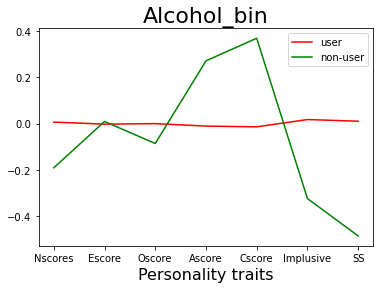

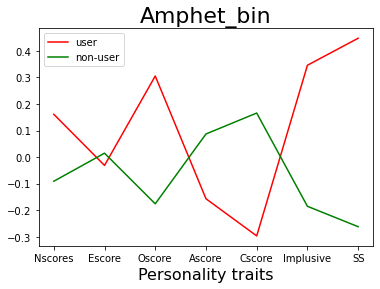

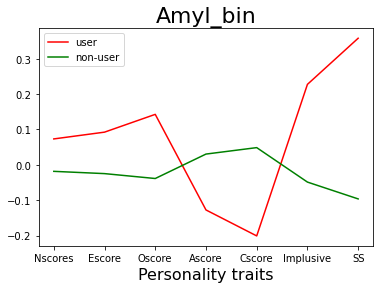

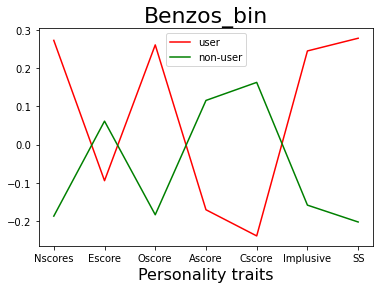

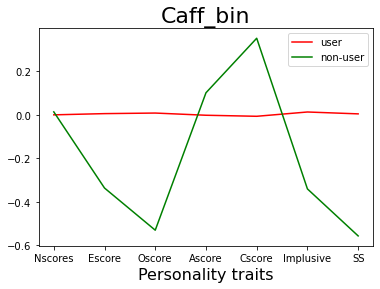

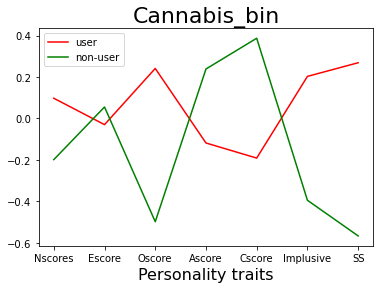

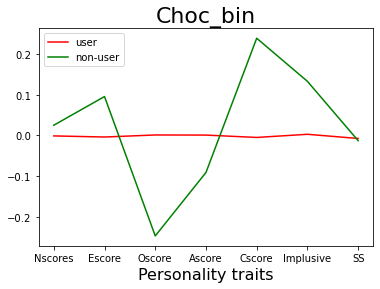

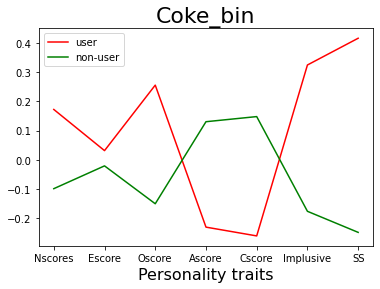

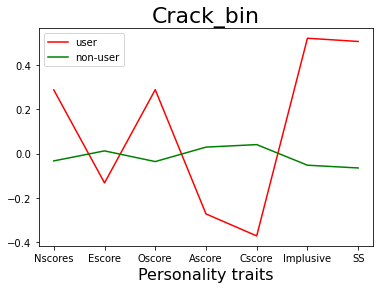

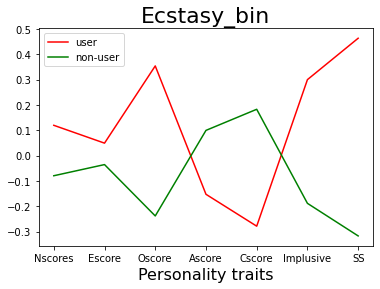

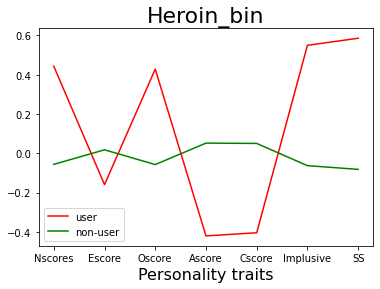

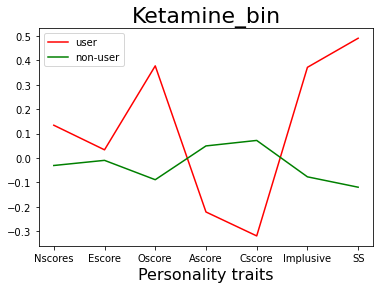

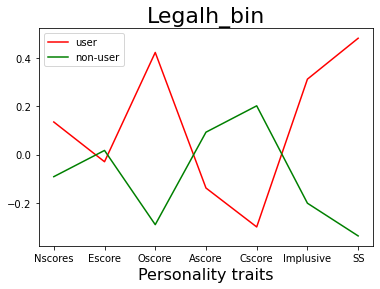

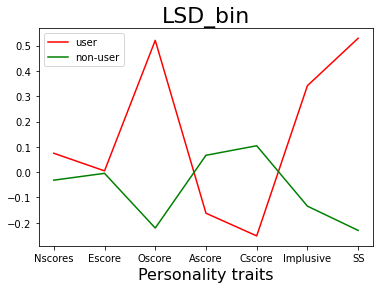

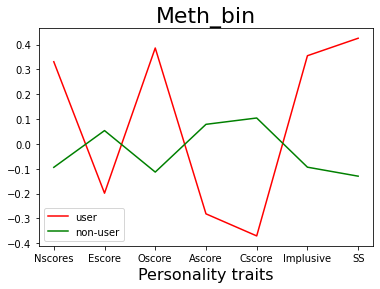

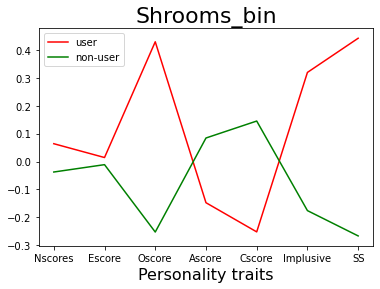

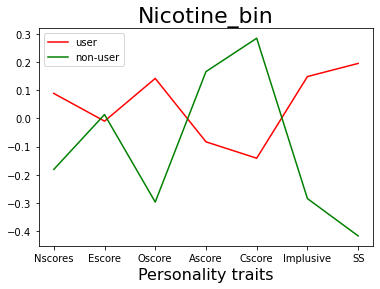

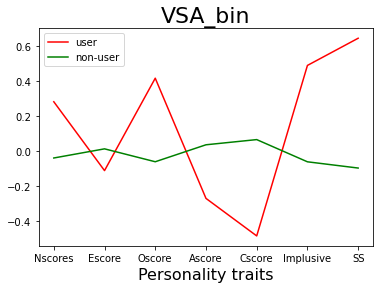

In [12]:
pers = df.columns[5:12]
for i,col in enumerate(df.columns[30:]):
    means_p = []
    user = []
    non_user=[]
    for per in pers:
        a = df.groupby(col)[per].mean()
        means_p.append(a)
        user.append(a[1])
        non_user.append(a[0])
            
        
    plt.plot(user, label='user', c='red')
    plt.plot(non_user, Label='non-user', c='green')
    positions = (0, 1, 2, 3, 4, 5, 6)
    labels = ("Nscores", "Escore", "Oscore", "Ascore", "Cscore", 'Implusive', 'SS')
    plt.xticks(positions, labels)
    plt.title(col, fontsize=22)
    plt.xlabel("Personality traits",fontsize=16)
    plt.legend()
    plt.show()

### Heatmap
Correlation between drugs

<AxesSubplot:>

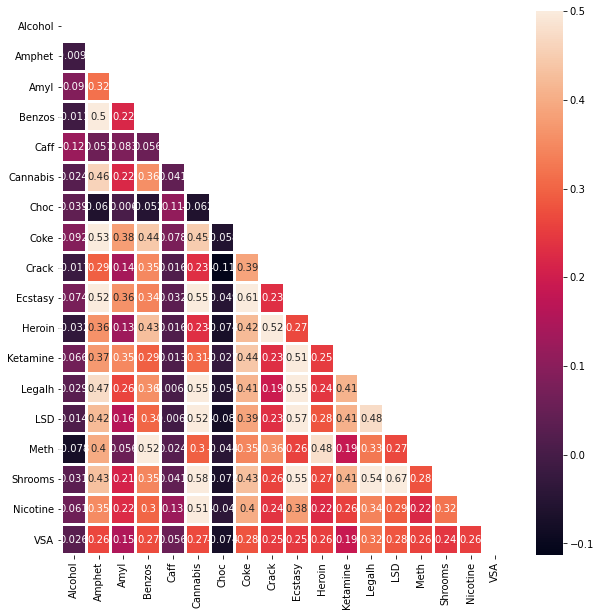

In [13]:
var = df.iloc[:,12:30]
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(var.corr())
sns.heatmap(var.corr(),annot=True, mask=mask, vmax=0.5, linewidths=2)

### Personality Traits

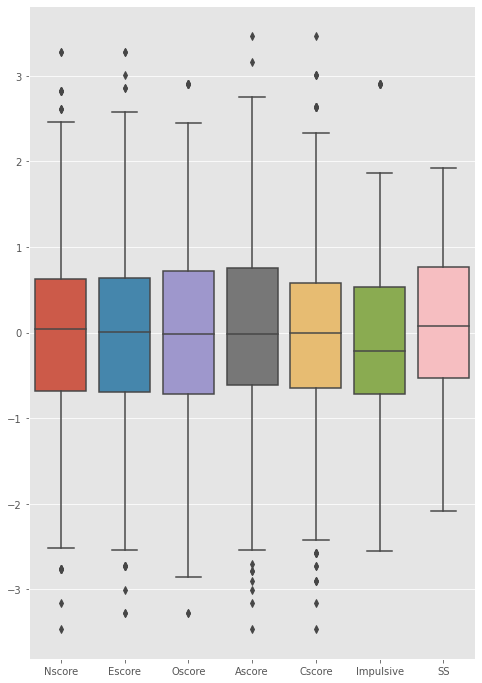

In [14]:
feature_col_names = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(8, 12))

ax = sns.boxplot(data = df[feature_col_names])

### Destribution personality traits 
mostly normal distributed

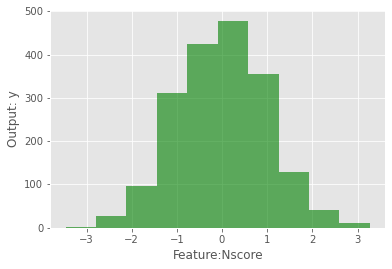

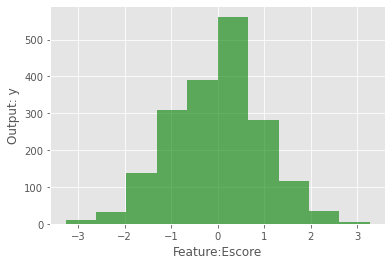

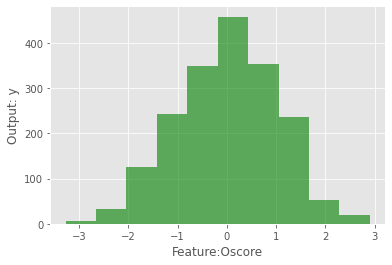

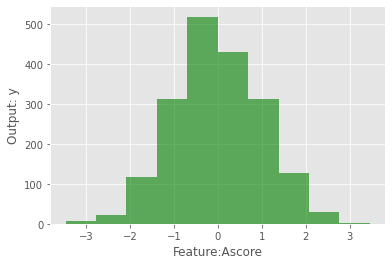

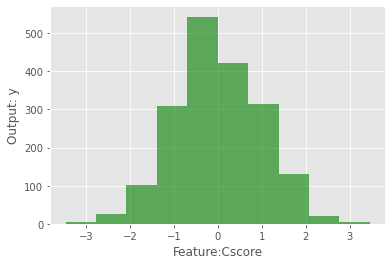

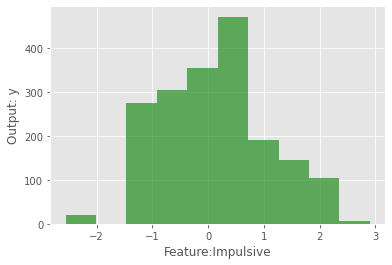

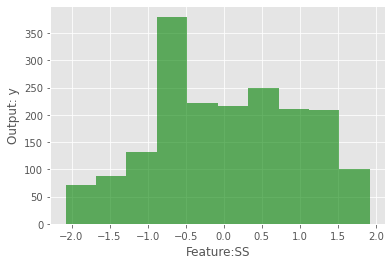

In [15]:
for i,col in enumerate(df.columns[5:12]):
    plt.figure(figsize=(6,4))
    plt.grid(True)
    plt.xlabel('Feature:'+col,fontsize=12)
    plt.ylabel('Output: y',fontsize=12)
    plt.hist(df[col],alpha=0.6,facecolor='g')

### User vs non-user per drug

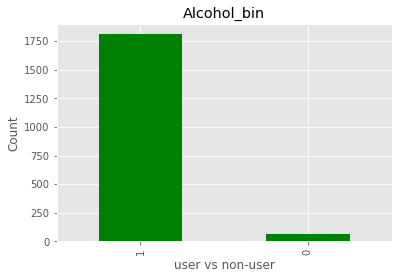

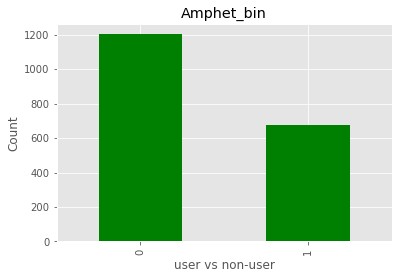

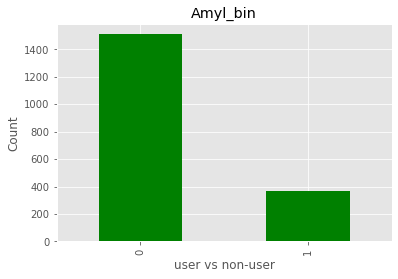

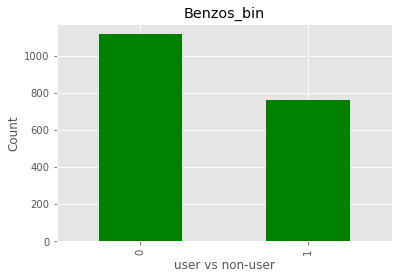

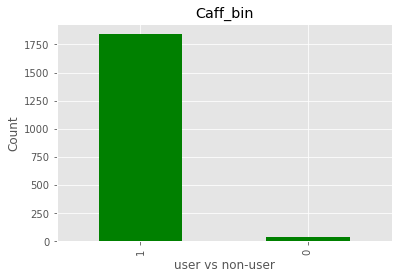

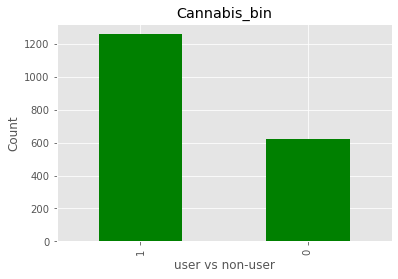

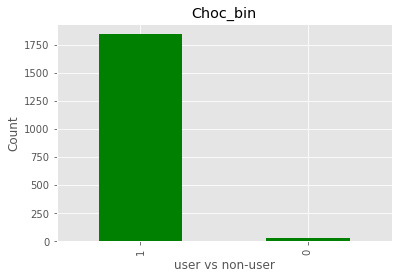

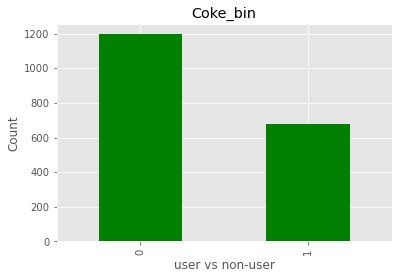

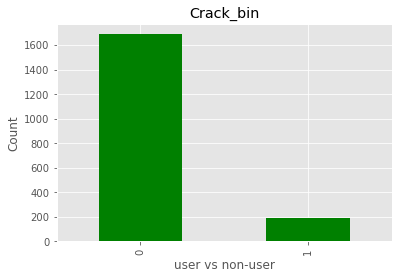

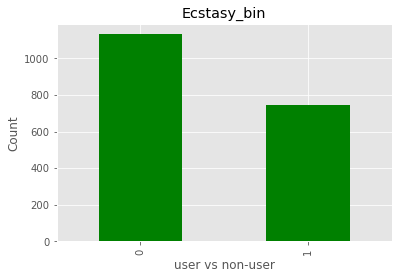

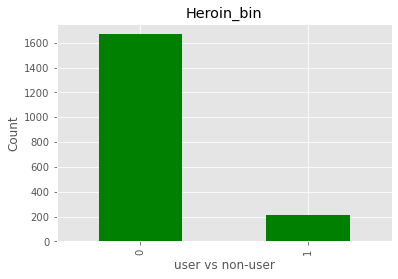

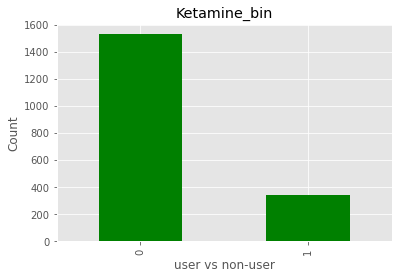

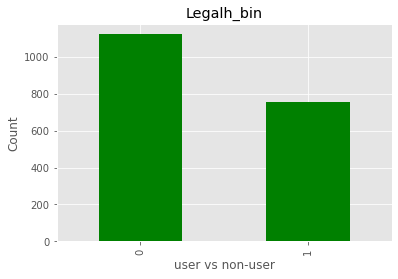

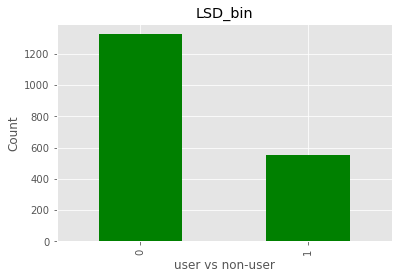

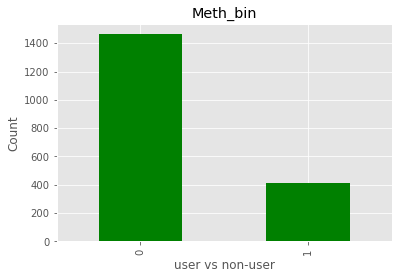

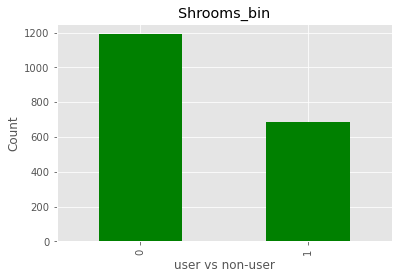

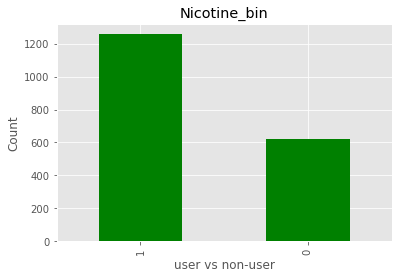

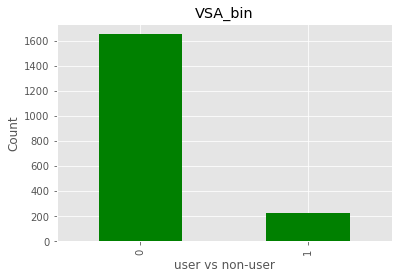

In [16]:

for i,col in enumerate(df.columns[30:]):
    ax = df[col].value_counts().plot(kind='bar',
                                        figsize=(6,4),
                                        title=col, color='g')
    ax.set_xlabel('user vs non-user',fontsize=12)
    ax.set_ylabel('Count',fontsize=12)
    plt.show()
    
    
   # plt.xlabel('Feature:'+col,fontsize=12)
   # plt.ylabel('Output: y',fontsize=12)
  #  plt.hist(df[col],alpha=0.6,facecolor='g')

### Count of usage per drug and trait
each trait should be inouted manually 

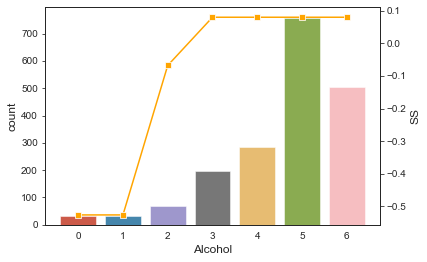

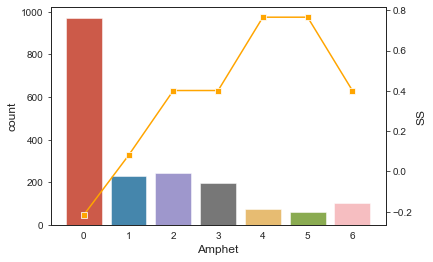

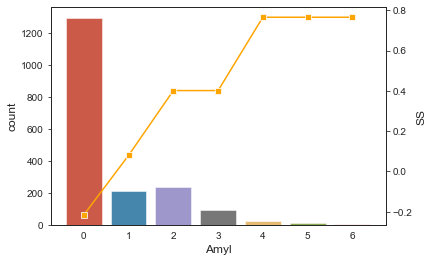

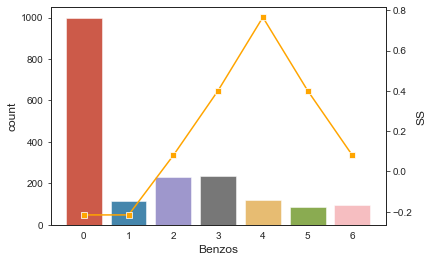

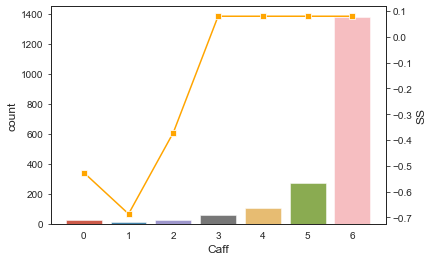

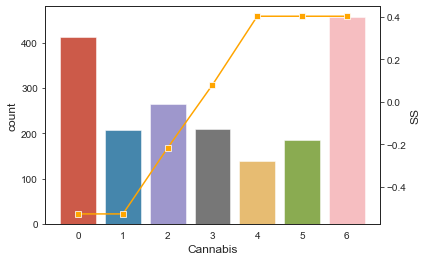

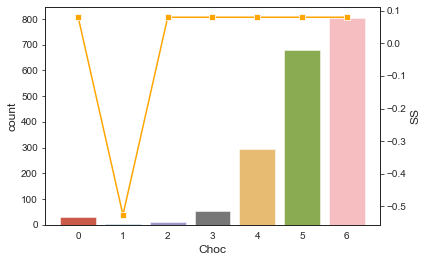

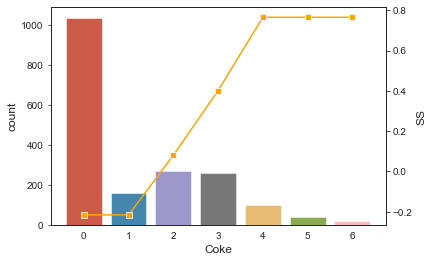

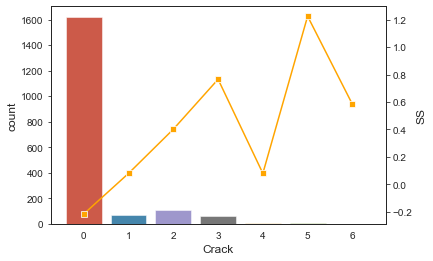

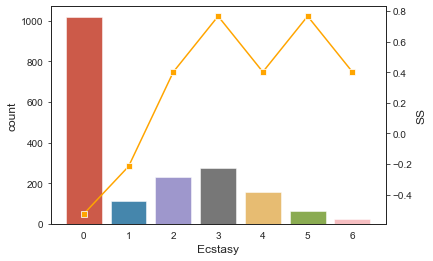

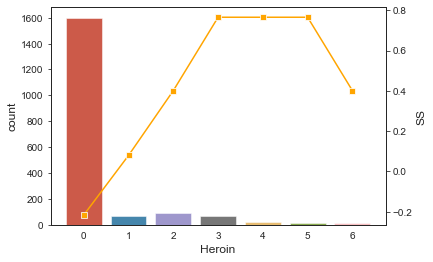

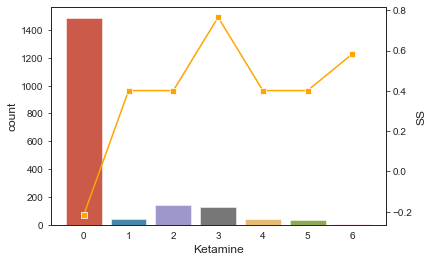

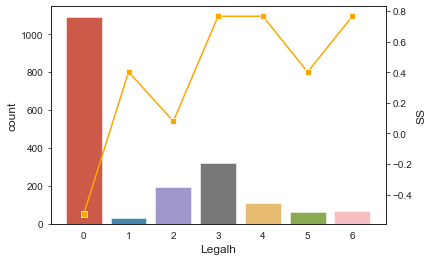

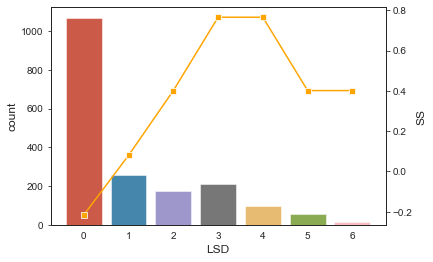

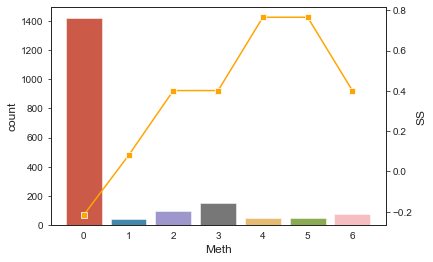

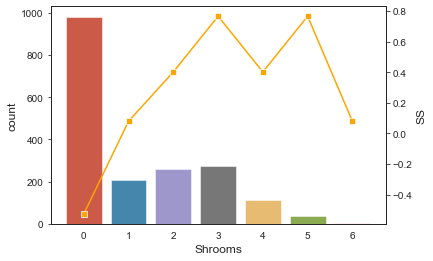

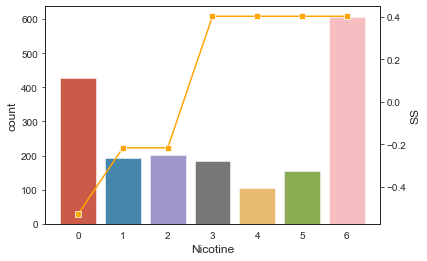

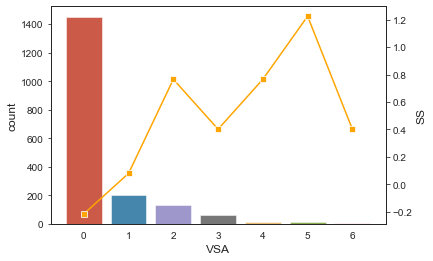

In [17]:
pers = df.columns[5:12].values
features = df.columns.tolist()[5:]
traits = df[features]
for i, drug_1 in enumerate(df.columns[12:30]):
    alc_sorted = df.sort_values(drug_1)
    group_alc = traits.groupby(drug_1)
    group_alc_mean = group_alc.median()
    sns.set_style("white")
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    ax1.grid(False)
    ax2.grid(False)
    sns.countplot(x=drug_1, data=alc_sorted,ax=ax1)
    sns.lineplot(x=group_alc_mean.index, y='SS', data=group_alc_mean,
             marker='s',color='orange',ax=ax2)
    plt.show()

## Count of Usage per drug

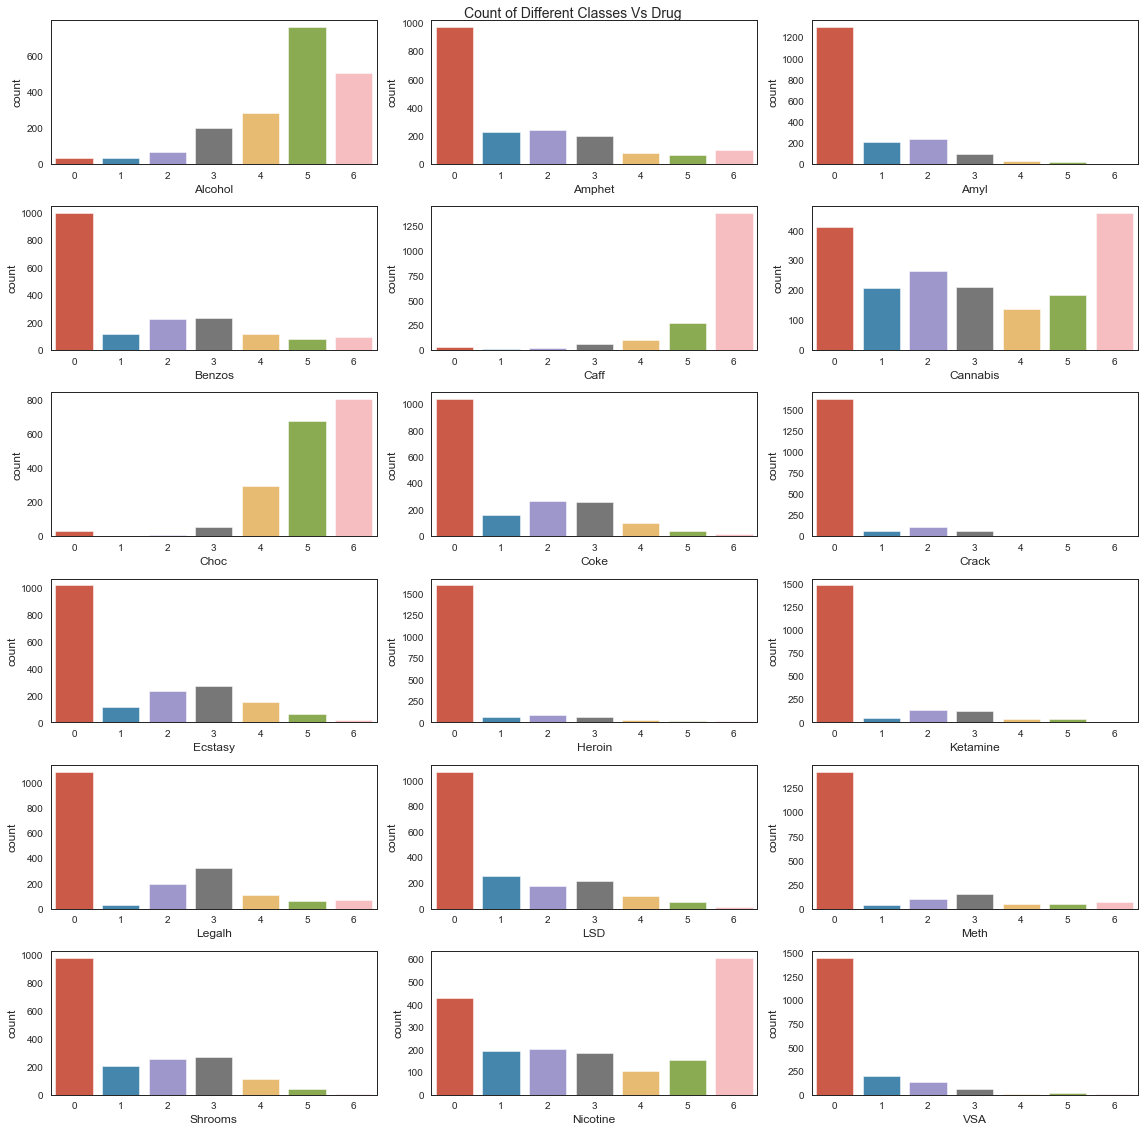

In [18]:
fig, axes = plt.subplots(6,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
columns = df.columns[12:30]
for i in range(6):
    for j in range(3):
        sns.countplot(x=columns[k], data=df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

## Count of usage per bin

In [19]:
alc_gr = df.groupby('Alcohol_bin')
alc_gr.mean()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA,Amphet_bin,Amyl_bin,Benzos_bin,Caff_bin,Cannabis_bin,Choc_bin,Coke_bin,Crack_bin,Ecstasy_bin,Heroin_bin,Ketamine_bin,Legalh_bin,LSD_bin,Meth_bin,Shrooms_bin,Nicotine_bin,VSA_bin
Alcohol_bin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.522388,-0.190686,0.009156,-0.085899,0.270600,0.368047,-0.323259,-0.484366,0.507463,0.805970,0.253731,0.970149,4.865672,2.179104,4.776119,0.373134,0.179104,0.567164,0.238806,0.149254,0.985075,0.731343,0.955224,0.686567,2.179104,0.313433,0.164179,0.029851,0.268657,0.865672,0.373134,0.925373,0.074627,0.044776,0.134328,0.044776,0.029851,0.238806,0.134328,0.223881,0.179104,0.388060,0.044776
1,0.500000,0.006487,-0.002362,-0.000163,-0.010698,-0.014032,0.017455,0.010248,4.790608,1.357459,0.619890,1.480110,5.507182,3.009945,5.122099,1.185635,0.300000,1.337017,0.377348,0.579558,1.366851,1.065193,0.821547,1.196133,3.232597,0.433702,0.366298,0.202210,0.411050,0.984530,0.680663,0.983978,0.373481,0.102210,0.406630,0.113812,0.190055,0.408840,0.299448,0.220442,0.372928,0.679558,0.123204


In [20]:
#pers = df.iloc[:,5:12].copy()
#pers.head()

In [21]:
#features = df.columns.tolist()[5:12] + df.columns.tolist()[30:]
#pers = df[features]
#pers.head()